In [1]:
#NIKHIL KUMAR NYALAM-11636071

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#1(ONE)
def getData(filename):
    canData = []  # CANDATA LIST
    f = open(filename)
    read_file = f.readlines()
    speed = []
    rpm = []
    i=0
    for row in read_file:
      #POSITIONS ARE VERIFIED 
        record = {
            'stamp': row[1:18],
            'PID': row[25:28],
            'const1': row[29:33],
            'change': row[33:41],
            'value': int(row[41:45], 16),  
            'value2': 0,
            'attack': 0
        }
        
        if record["PID"] == '254':  # CAN ID SHOULD BE 254 FOR SPEED
            if record["value"] >= 4095:
                record["attack"] = 1
            record['value'] = (record['value'] * 0.62137119) / 100
            speed.append(record['value'])
        
        if record["PID"] == '115':  # CANID SHOULD BE 115 
            if record["value"] >= 65535:
                record["attack"] = 1
            record['value'] = (record['value'] * 2)
            rpm.append(record['value'])
        
        i=i+1
        canData.append(record)
    f.close()
    return canData

def dict_to_df(data_dict):
    # DICTIONART TO DATAFRAME
    df = pd.DataFrame.from_dict(data_dict)
    #df = df.drop(columns=['stamp', 'const1', 'change', 'value2'])
    df = df.loc[(df['PID'] == '115') | (df['PID'] == '254')]
    df = df.reset_index(drop=True)
    one_hot = pd.get_dummies(df['PID'])
    df = df.drop('PID', axis=1)
    df = df.join(one_hot)
    df = df[['115', '254', 'value', 'attack']]
    df.rename(columns={'115': 'RPM', '254': 'Speed'}, inplace=True) #115 RO RPM AND 254 TO SPEED
    #df.loc[df['RPM'] == 1, 'RPM'] = df['value']
    #df.loc[df['Speed'] == 1, 'Speed'] = df['value']
    #df = df.drop(columns=['value'])  
    return df
#normalisation of the column called value to bring in range 0,1
def normalize(df):
    values = df['value'].values

    values = values.reshape(-1, 1)

    min_max_scaler = MinMaxScaler()
    
    scaled_values = min_max_scaler.fit_transform(values)

    df['value'] = scaled_values

    return df



fff_injection_df = dict_to_df(getData("C:\\Users\\nyala\\Downloads\\CAN Bus log\\CAN Bus log - injection of FFF as the speed reading.log"))
rpm_injection_df = dict_to_df(getData("C:\\Users\\nyala\\Downloads\\CAN Bus log\\CAN Bus log - injection of RPM readings.log"))
no_injection_df = dict_to_df(getData("C:\\Users\\nyala\\Downloads\\CAN Bus log\\CAN bus log - no injection of messages.log"))


fff_injection_df=normalize(fff_injection_df)
rpm_injection_df=normalize(rpm_injection_df)
no_injection_df=normalize(no_injection_df)
original_fff=fff_injection_df 
original_rpm=rpm_injection_df
original_no=no_injection_df
print(original_fff)

#dropping of column attack
column_to_drop='attack'

fff_injection_df = fff_injection_df.drop(column_to_drop, axis=1)
rpm_injection_df = rpm_injection_df.drop(column_to_drop, axis=1)  
no_injection_df= no_injection_df.drop(column_to_drop, axis=1)

print("fff_injection_df  :")
print(fff_injection_df)
print("rpm_injection_df  :")
print(rpm_injection_df)
print("no_injection_df  :")
print(no_injection_df)


       RPM  Speed     value  attack
0        1      0  0.353273       0
1        0      1  0.000000       0
2        1      0  0.352144       0
3        0      1  0.000000       0
4        1      0  0.352144       0
...    ...    ...       ...     ...
14430    0      1  0.003096       0
14431    0      1  0.014360       1
14432    0      1  0.014360       1
14433    1      0  0.511287       0
14434    0      1  0.014360       1

[14435 rows x 4 columns]
fff_injection_df  :
       RPM  Speed     value
0        1      0  0.353273
1        0      1  0.000000
2        1      0  0.352144
3        0      1  0.000000
4        1      0  0.352144
...    ...    ...       ...
14430    0      1  0.003096
14431    0      1  0.014360
14432    0      1  0.014360
14433    1      0  0.511287
14434    0      1  0.014360

[14435 rows x 3 columns]
rpm_injection_df  :
      RPM  Speed     value
0       1      0  0.005607
1       0      1  0.000001
2       1      0  0.005622
3       0      1  0.000001
4    

In [3]:
#2(TWO)
def divide(df):
    df_speed=df[['Speed','value']]
    df_rpm=df[['RPM','value']]
    return df_speed,df_rpm
#making 6 data frames
ff_speed,ff_rpm=divide(fff_injection_df)
rpm_speed,rpm_rpm=divide(rpm_injection_df)
no_speed,no_rpm=divide(no_injection_df)
#print(ff_speed)
#print(ff_rpm)

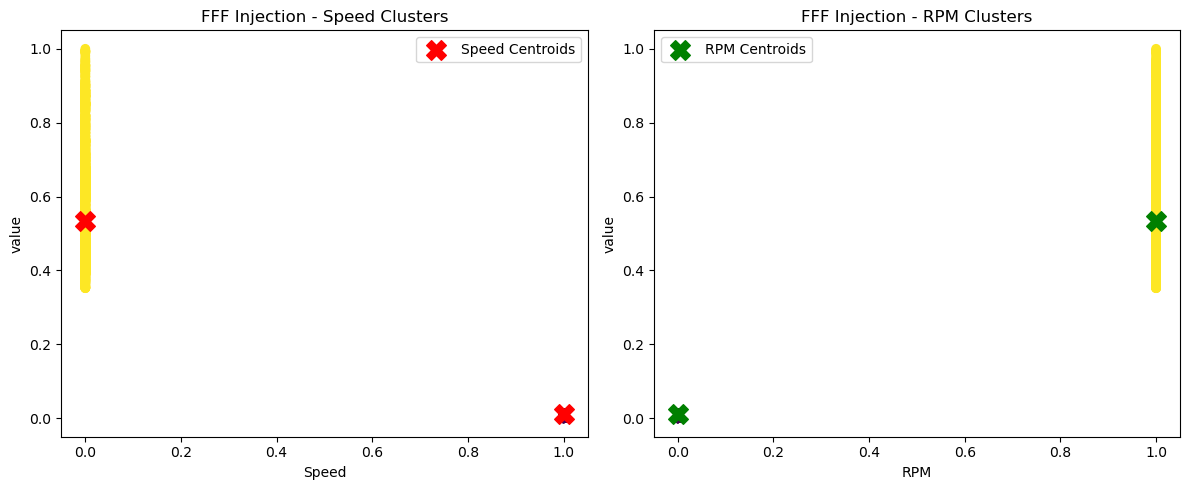

scenario_name  Speed Cluster Assignments:
       Speed     value  Speed_Cluster
0          0  0.353273              1
1          1  0.000000              0
2          0  0.352144              1
3          1  0.000000              0
4          0  0.352144              1
...      ...       ...            ...
14430      1  0.003096              0
14431      1  0.014360              0
14432      1  0.014360              0
14433      0  0.511287              1
14434      1  0.014360              0

[14435 rows x 3 columns]
Speed Centroids:
[[1.00000000e+00 1.22261514e-02]
 [1.22124533e-15 5.33548390e-01]]
RPM Cluster Assignments:
       RPM     value  RPM_Cluster
0        1  0.353273            1
1        0  0.000000            0
2        1  0.352144            1
3        0  0.000000            0
4        1  0.352144            1
...    ...       ...          ...
14430    0  0.003096            0
14431    0  0.014360            0
14432    0  0.014360            0
14433    1  0.511287       

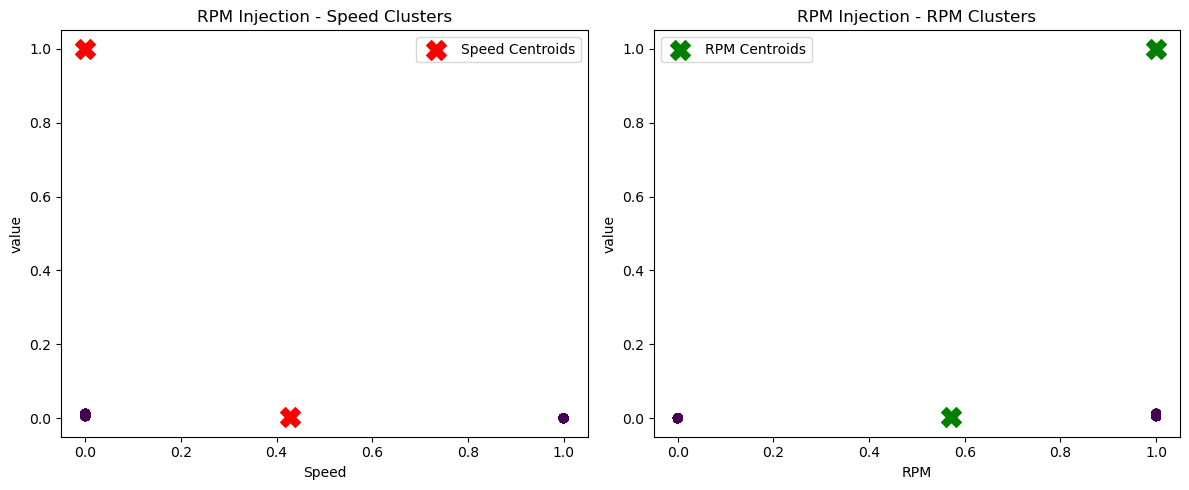

scenario_name  Speed Cluster Assignments:
      Speed     value  Speed_Cluster
0         0  0.005607              0
1         1  0.000001              0
2         0  0.005622              0
3         1  0.000001              0
4         0  0.005637              0
...     ...       ...            ...
4538      1  0.000021              0
4539      0  1.000000              1
4540      0  0.006690              0
4541      0  1.000000              1
4542      0  1.000000              1

[4543 rows x 3 columns]
Speed Centroids:
[[ 4.28796637e-01  4.18103888e-03]
 [-3.88578059e-16  1.00000000e+00]]
RPM Cluster Assignments:
      RPM     value  RPM_Cluster
0       1  0.005607            0
1       0  0.000001            0
2       1  0.005622            0
3       0  0.000001            0
4       1  0.005637            0
...   ...       ...          ...
4538    0  0.000021            0
4539    1  1.000000            1
4540    1  0.006690            0
4541    1  1.000000            1
4542    1  1.

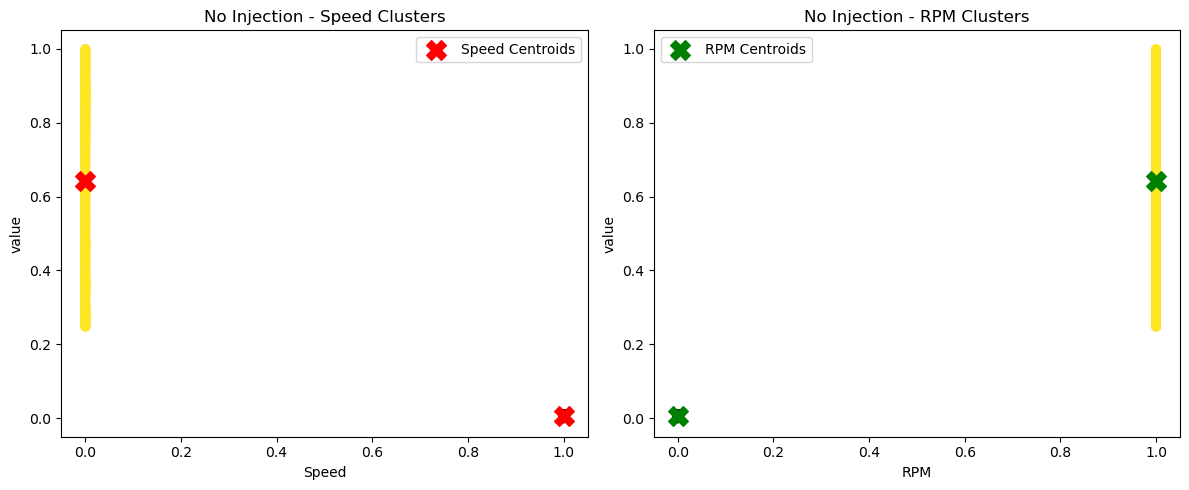

scenario_name  Speed Cluster Assignments:
      Speed     value  Speed_Cluster
0         0  0.247471              1
1         1  0.000000              0
2         0  0.249027              1
3         1  0.000000              0
4         0  0.249027              1
...     ...       ...            ...
1644      0  0.273152              1
1645      0  0.273152              1
1646      1  0.001182              0
1647      0  0.273152              1
1648      1  0.001141              0

[1649 rows x 3 columns]
Speed Centroids:
[[ 1.00000000e+00  6.55061868e-03]
 [-6.10622664e-16  6.41226135e-01]]
RPM Cluster Assignments:
      RPM     value  RPM_Cluster
0       1  0.247471            1
1       0  0.000000            0
2       1  0.249027            1
3       0  0.000000            0
4       1  0.249027            1
...   ...       ...          ...
1644    1  0.273152            1
1645    1  0.273152            1
1646    0  0.001182            0
1647    1  0.273152            1
1648    0  0.

In [4]:
#2(Two)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

def perform_kmeans_and_plot(df_speed, df_rpm, scenario_name):
#building the model k means clustering 
 
    kmeans_speed = KMeans(n_clusters=2, random_state=0)
    df_speed['Speed_Cluster'] = kmeans_speed.fit_predict(df_speed[['Speed', 'value']])
    speed_centroids = kmeans_speed.cluster_centers_
    
#finding out the centroid by the function cluster centers
    kmeans_rpm = KMeans(n_clusters=2, random_state=0)
    df_rpm['RPM_Cluster'] = kmeans_rpm.fit_predict(df_rpm[['RPM', 'value']])
    rpm_centroids = kmeans_rpm.cluster_centers_

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(df_speed['Speed'], df_speed['value'], c=df_speed['Speed_Cluster'], cmap='viridis')
    plt.scatter(speed_centroids[:, 0], speed_centroids[:, 1], marker='X', s=200, c='red', label='Speed Centroids')
    plt.title(f'{scenario_name} - Speed Clusters')
    plt.xlabel('Speed')
    plt.ylabel('value')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(df_rpm['RPM'], df_rpm['value'], c=df_rpm['RPM_Cluster'], cmap='viridis')
    plt.scatter(rpm_centroids[:, 0], rpm_centroids[:, 1], marker='X', s=200, c='green', label='RPM Centroids')
    plt.title(f'{scenario_name} - RPM Clusters')
    plt.xlabel('RPM')
    plt.ylabel('value')
    plt.legend()

    plt.tight_layout()
    plt.show()
    print('scenario_name  Speed Cluster Assignments:')
    print(df_speed[['Speed', 'value', 'Speed_Cluster']])
    print('Speed Centroids:')
    print(speed_centroids)
    
    print('RPM Cluster Assignments:')
    print(df_rpm[['RPM', 'value', 'RPM_Cluster']])
    print('RPM Centroids:')
    print(rpm_centroids)

perform_kmeans_and_plot(ff_speed, ff_rpm, 'FFF Injection')
perform_kmeans_and_plot(rpm_speed, rpm_rpm, 'RPM Injection')
perform_kmeans_and_plot(no_speed, no_rpm, 'No Injection')


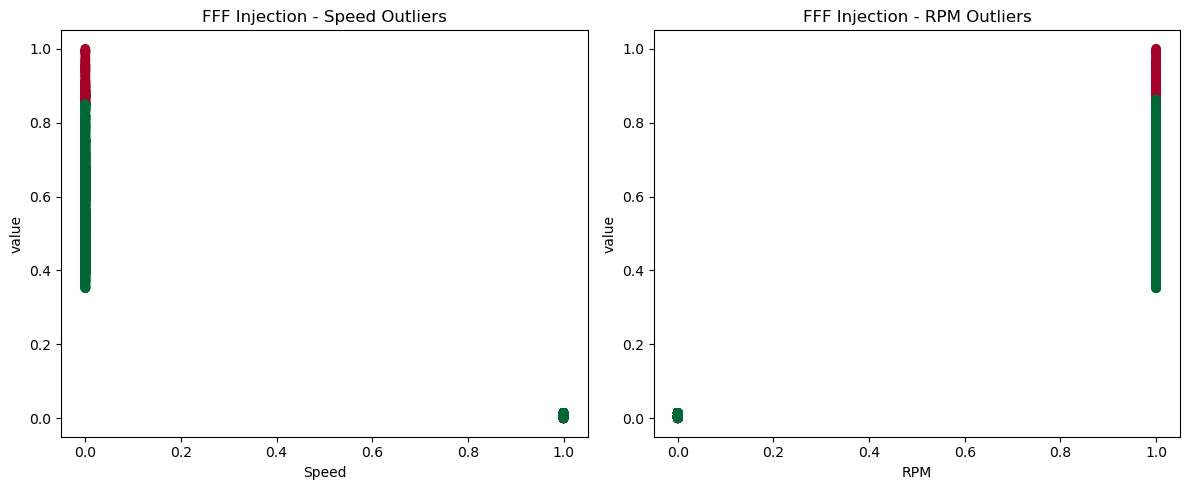

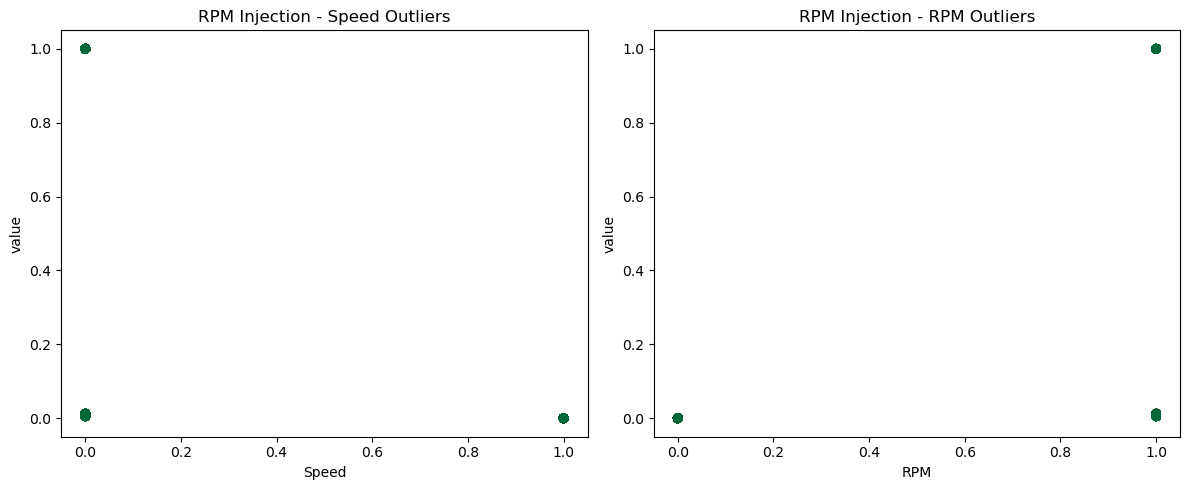

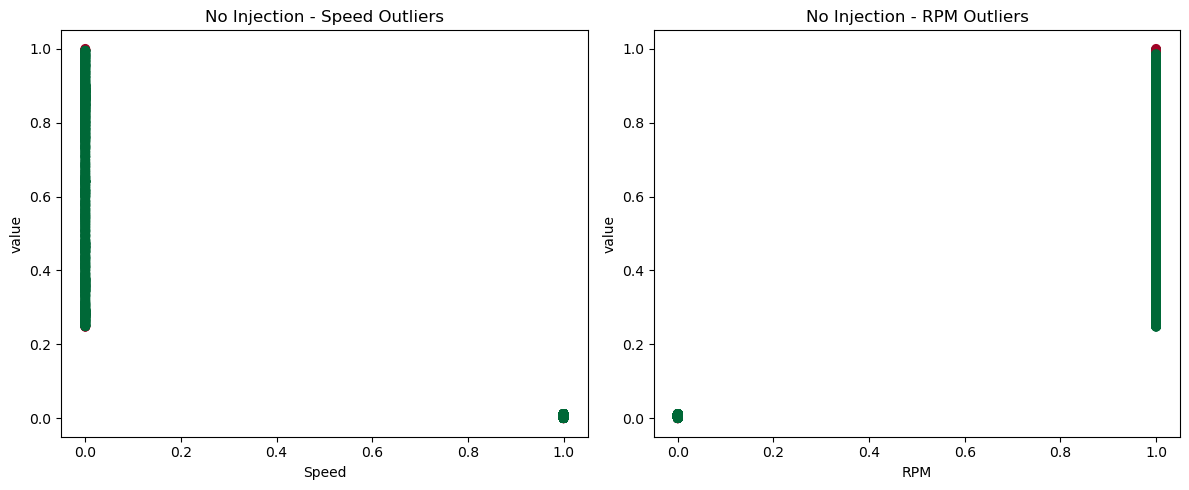

Anomalies in FFF Injection - Speed:
      Speed     value  Speed_Cluster  Speed_Outlier
1         1  0.000000              0             -1
3         1  0.000000              0             -1
6         1  0.000000              0             -1
8         1  0.000000              0             -1
10        1  0.000000              0             -1
...     ...       ...            ...            ...
3076      0  0.896163              1             -1
3081      0  0.884876              1             -1
3086      0  0.874718              1             -1
3091      0  0.863431              1             -1
3095      0  0.854402              1             -1

[142 rows x 4 columns]
Anomalies in FFF Injection - RPM:
      RPM     value  RPM_Cluster  RPM_Outlier
1       0  0.000000            0           -1
3       0  0.000000            0           -1
6       0  0.000000            0           -1
8       0  0.000000            0           -1
10      0  0.000000            0           -1
...   

In [5]:
#3(Three)

from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

#Isolation forest and scateer plot
def fit_isolation_forest_and_plot(df_speed, df_rpm, scenario_name):
    # Speed
    iso_forest_speed = IsolationForest(contamination=0.01, random_state=0)
    df_speed['Speed_Outlier'] = iso_forest_speed.fit_predict(df_speed[['Speed', 'value']])

    # RPM
    iso_forest_rpm = IsolationForest(contamination=0.01, random_state=0)
    df_rpm['RPM_Outlier'] = iso_forest_rpm.fit_predict(df_rpm[['RPM', 'value']])
    df_speed.to_csv('anomalies_speed1.csv', index=False)

    # Save anomalies in RPM dataset to a CSV file
    df_rpm.to_csv('anomalies_rpm1.csv', index=False)


    # plots
    plt.figure(figsize=(12, 5))

    # Scatter plot for Speed
    plt.subplot(1, 2, 1)
    plt.scatter(df_speed['Speed'], df_speed['value'], c=df_speed['Speed_Outlier'], cmap='RdYlGn')

    plt.title(f'{scenario_name} - Speed Outliers')
    plt.xlabel('Speed')
    plt.ylabel('value')

    # Scatter plot for RPM
    plt.subplot(1, 2, 2)
    plt.scatter(df_rpm['RPM'], df_rpm['value'], c=df_rpm['RPM_Outlier'], cmap='RdYlGn')
    plt.title(f'{scenario_name} - RPM Outliers')
    plt.xlabel('RPM')
    plt.ylabel('value')

    plt.tight_layout()
    plt.show()

    return df_speed, df_rpm


def get_anomalies(df_speed, df_rpm, scenario_name):
    speed_anomalies = df_speed[df_speed['Speed_Outlier'] == -1]
    rpm_anomalies = df_rpm[df_rpm['RPM_Outlier'] == -1]

    print(f'Anomalies in {scenario_name} - Speed:')
    print(speed_anomalies)

    print(f'Anomalies in {scenario_name} - RPM:')
    print(rpm_anomalies)




ff_speed, ff_rpm = fit_isolation_forest_and_plot(ff_speed, ff_rpm, 'FFF Injection')
rpm_speed, rpm_rpm = fit_isolation_forest_and_plot(rpm_speed, rpm_rpm, 'RPM Injection')
no_speed, no_rpm = fit_isolation_forest_and_plot(no_speed, no_rpm, 'No Injection')

# Get anomalies for each scenario
get_anomalies(ff_speed, ff_rpm, 'FFF Injection')
get_anomalies(rpm_speed, rpm_rpm, 'RPM Injection')
get_anomalies(no_speed, no_rpm, 'No Injection')


In [6]:
#!pip install hmmlearn

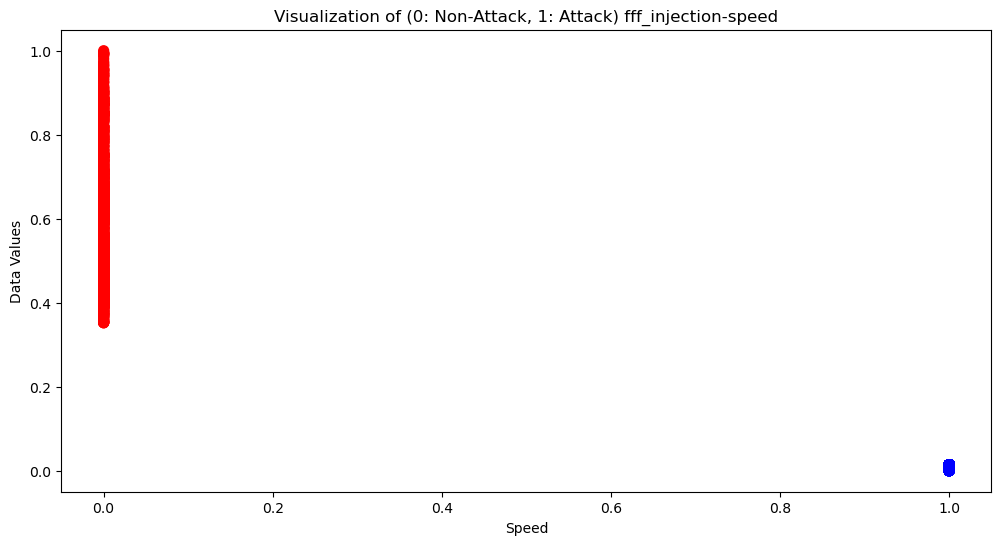

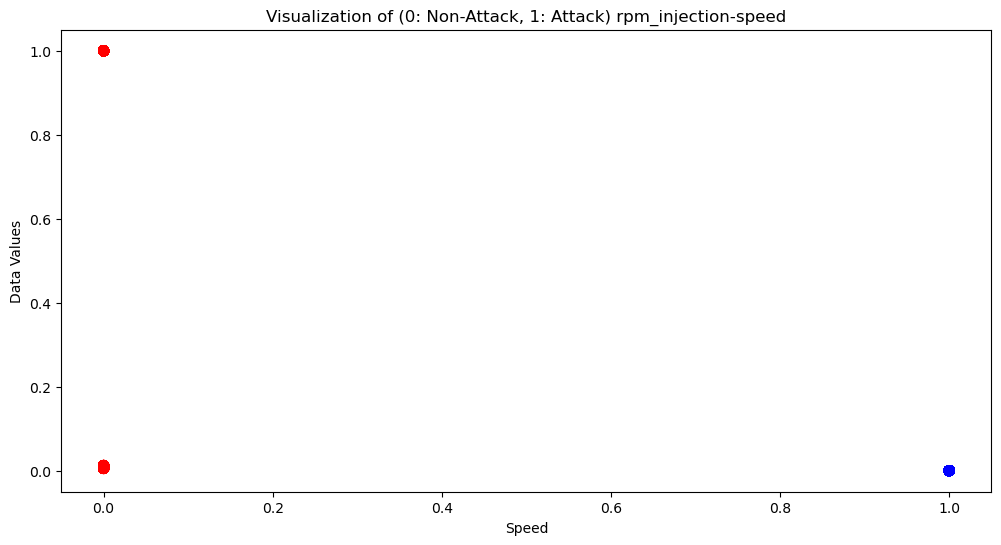

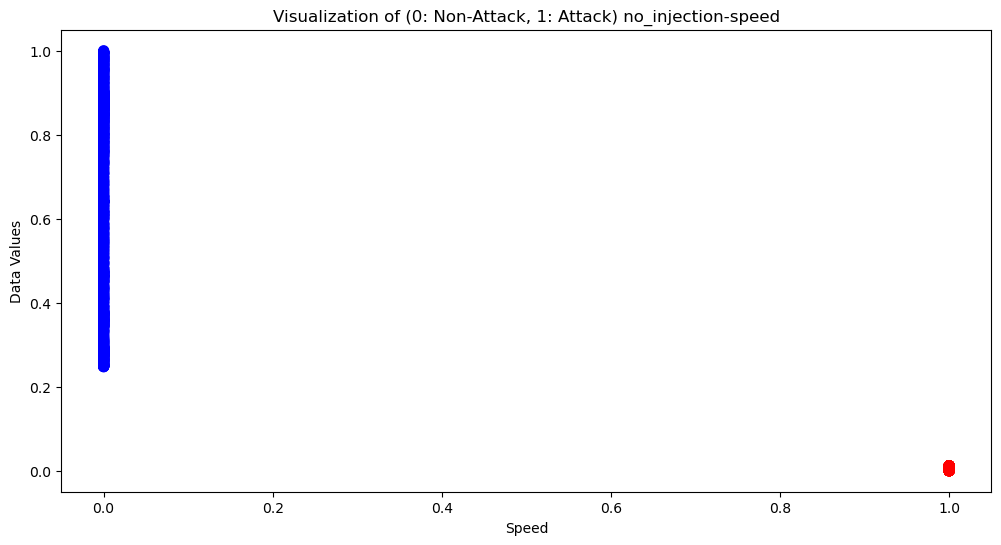

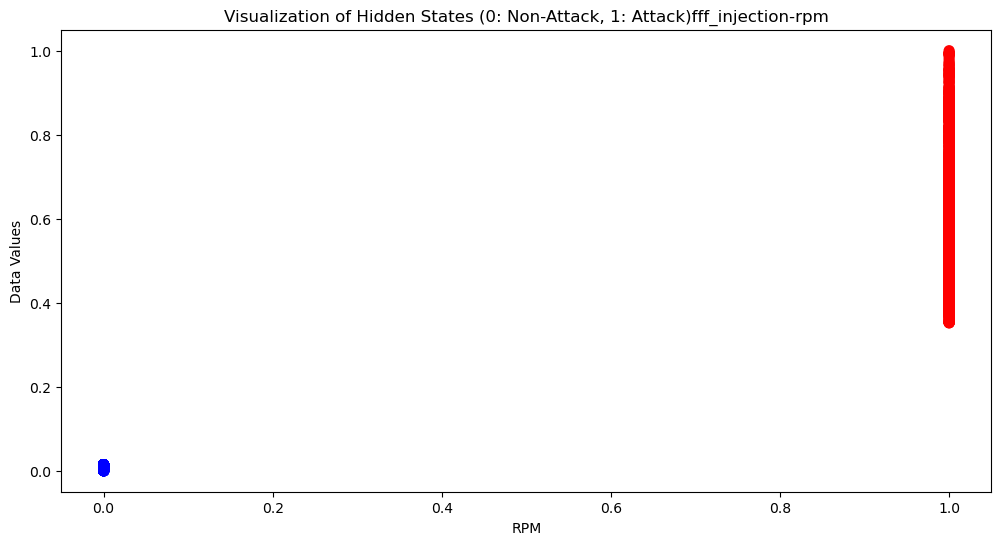

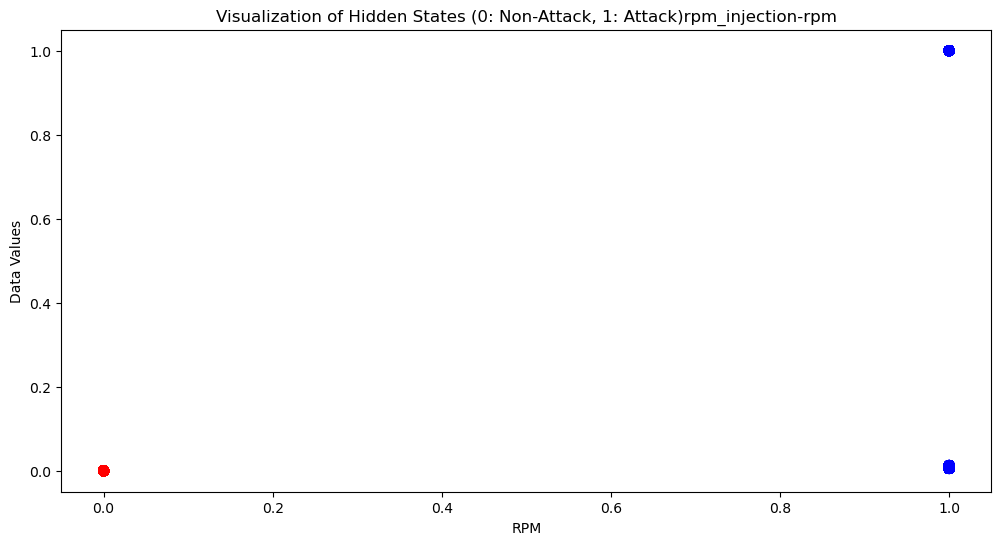

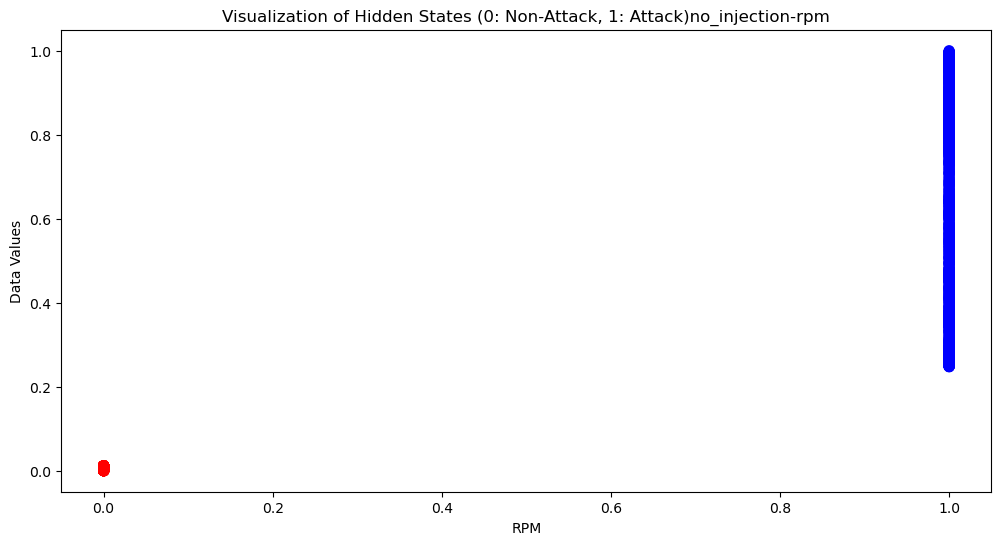

0

In [7]:
#4(fourjkmnm)
import numpy as np
from hmmlearn import hmm
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd


def hmm1(df,s):
       
        sequences = df[['Speed']].values

        #HMM model
        n_components = 2  # Number of hidden states
        model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=100)

        # Train the HMM
        model.fit(sequences)

        # trained HMM is used to decode the most likely sequence of hidden states
        decoded_states = model.predict(sequences)

        # Hidden States are visualized 
        plt.figure(figsize=(12, 6))

        colors = ['blue' if state == 0 else 'red' for state in decoded_states]

        plt.scatter(sequences, df['value'], c=colors, s=50)

        plt.xlabel("Speed")
        plt.ylabel("Data Values")
        plt.title("Visualization of (0: Non-Attack, 1: Attack) "+s)

        plt.show()
        return 0

def hmm2(df,s):
        
        sequences = df[['RPM']].values

        # HMM model
        n_components = 2  # Number of hidden states
        model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=100)

        # Train the HMM
        model.fit(sequences)

      
        decoded_states = model.predict(sequences)

       
        plt.figure(figsize=(12, 6))

      
        colors = ['blue' if state == 0 else 'red' for state in decoded_states]

        
        plt.scatter(sequences, df['value'], c=colors, s=50)

       
        plt.xlabel("RPM")
        plt.ylabel("Data Values")
        plt.title("Visualization of Hidden States (0: Non-Attack, 1: Attack)"+s)

        plt.show()
        return 0

hmm1(original_fff,'fff_injection-speed')
hmm1(original_rpm,'rpm_injection-speed')
hmm1(original_no,'no_injection-speed')
hmm2(original_fff,'fff_injection-rpm')
hmm2(original_rpm,'rpm_injection-rpm')
hmm2(original_no,'no_injection-rpm')